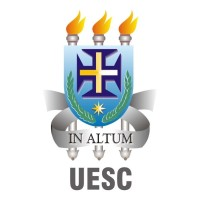
### Autor(es): Andrei Silva Santos e Laverty Diderone de Assis Ladeia
Programa de Pós-Graduação em Modelagem Computacional</br>
Disciplina: Métodos Numéricos</br>
Turma: 2024.1</br></br>
Plataforma:</br>
- CPU: 12th Gen Intel(R) Core(TM) i5-12500H, 16 núcleos 4.5 GHz
- Memory: 8GiB 4800 MT/s
- Swap: 16GiB
- GPU: GeForce RTX 3050
- SO: Ubuntu 22.04
- Python 3.1erro_aceitavel2
- Driver Version: 550.54.14
- CUDA Version: 12.4

### 1. Considere os seguintes dados:

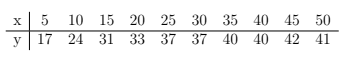

### utilize as técnicas de regressão por mínimos quadrados para ajustar os dados a

#### a) Uma reta:

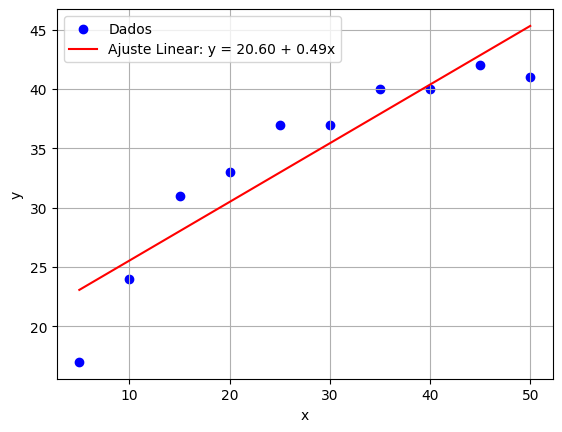

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Dados fornecidos
x = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
y = np.array([17, 24, 31, 33, 37, 37, 40, 40, 42, 41])

# Ajuste Linear
n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2 = np.sum(x ** 2)

b_linear = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
a_linear = (sum_y - b_linear * sum_x) / n

# Valores ajustados
y_linear_fit = a_linear + b_linear * x

# Plotando os dados e os ajustes
plt.scatter(x, y, color='blue', label='Dados')
plt.plot(x, y_linear_fit, color='red', label='Ajuste Linear: y = {:.2f} + {:.2f}x'.format(a_linear, b_linear))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

#### b) A equação de potência $y = αe^β$:

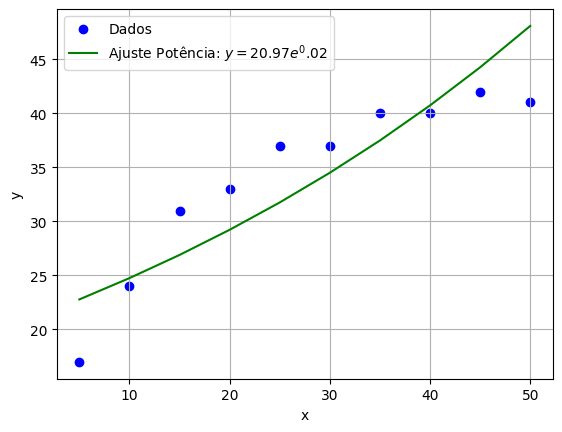

In [37]:
# Ajuste da Equação de Potência
ln_y = np.log(y)
sum_ln_y = np.sum(ln_y)
sum_x_ln_y = np.sum(x * ln_y)

beta_potencia = (n * sum_x_ln_y - sum_x * sum_ln_y) / (n * sum_x2 - sum_x ** 2)
A = (sum_ln_y - beta_potencia * sum_x) / n
alpha_potencia = np.exp(A)


y_power_fit = alpha_potencia * np.exp(beta_potencia * x)

# Plotando os dados e os ajustes
plt.scatter(x, y, color='blue', label='Dados')
plt.plot(x, y_power_fit, color='green', label='Ajuste Potência: $y = {:.2f}e^{:.2f}$'.format(alpha_potencia, beta_potencia))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

#### c) O modelo de crescimento com saturação $y = \frac{αx}{(β + x)}$:

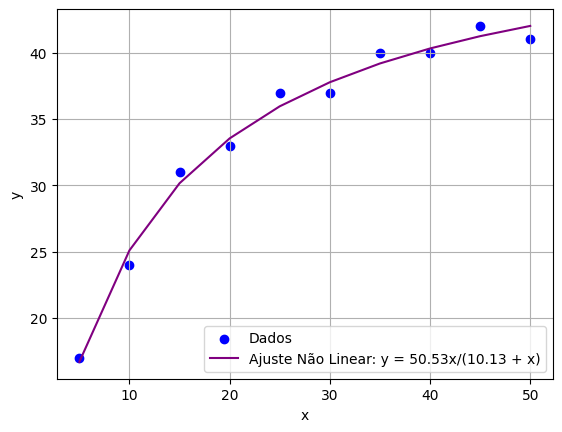

In [39]:
from scipy.optimize import curve_fit

# Função de ajuste
def model(x, alpha_saturacao, beta_saturacao):
    return (alpha_saturacao * x) / (beta_saturacao + x)

# Ajuste não linear
params, covariance = curve_fit(model, x, y, p0=[1, 1])

alpha_saturacao, beta_saturacao = params

# Valores ajustados
y_nonlinear_fit = model(x, alpha_saturacao, beta_saturacao)

# Plotando os dados e os ajustes
plt.scatter(x, y, color='blue', label='Dados')
plt.plot(x, y_nonlinear_fit, color='purple', label='Ajuste Não Linear: y = {:.2f}x/({:.2f} + x)'.format(alpha_saturacao, beta_saturacao))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

#### d) Uma parábola

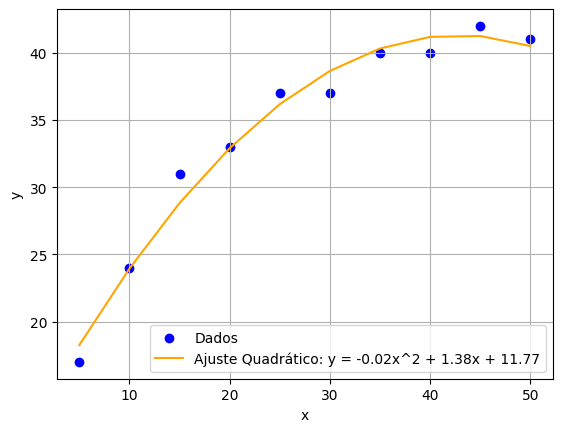

In [40]:
# Ajuste Quadrático
coefficients = np.polyfit(x, y, 2)
a_quadratico, b_quadratico, c = coefficients

# Valores ajustados
y_quadratic_fit = a_quadratico * x**2 + b_quadratico * x + c

# Plotando os dados e os ajustes
plt.scatter(x, y, color='blue', label='Dados')
plt.plot(x, y_quadratic_fit, color='orange', label='Ajuste Quadrático: y = {:.2f}x^2 + {:.2f}x + {:.2f}'.format(a_quadratico, b_quadratico, c))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

#### Construa um gráfico com conjunto de dados e as funções de ajustes propostas. Calcule o coeficiente de correlação para cada caso. Qual o melhor ajuste? Justifique sua resposta.

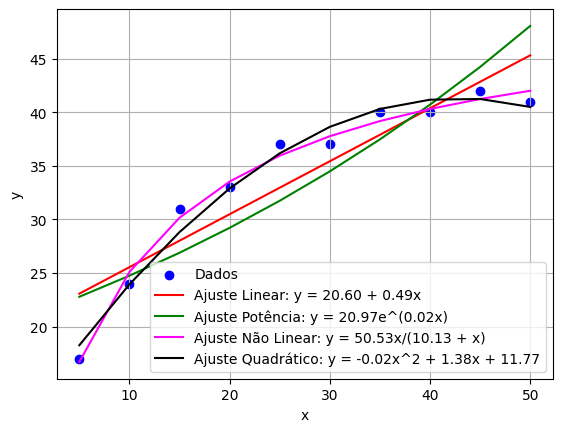

In [45]:
# Plotando os dados e os ajustes
plt.scatter(x, y, color='blue', label='Dados')
plt.plot(x, y_linear_fit, color='red', label='Ajuste Linear: y = {:.2f} + {:.2f}x'.format(a_linear, b_linear))
plt.plot(x, y_power_fit, color='green', label='Ajuste Potência: y = {:.2f}e^({:.2f}x)'.format(alpha_potencia, beta_potencia))
plt.plot(x, y_nonlinear_fit, color='magenta', label='Ajuste Não Linear: y = {:.2f}x/({:.2f} + x)'.format(alpha_saturacao, beta_saturacao))
plt.plot(x, y_quadratic_fit, color='black', label='Ajuste Quadrático: y = {:.2f}x^2 + {:.2f}x + {:.2f}'.format(a_quadratico, b_quadratico, c))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

In [48]:
# Calculando R^2 para cada ajuste

# Valores observados
y_mean = np.mean(y)

# Função para calcular R^2
def calculate_r2(y, y_fit):
    ss_total = np.sum((y - y_mean) ** 2)
    ss_residual = np.sum((y - y_fit) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

# Ajuste Linear
r2_linear = calculate_r2(y, y_linear_fit)

# Ajuste de Equação de Potência
r2_power = calculate_r2(y, y_power_fit)

# Ajuste Não Linear
r2_nonlinear = calculate_r2(y, y_nonlinear_fit)

# Ajuste Quadrático
r2_quadratic = calculate_r2(y, y_quadratic_fit)

print(f"R² Linear: {r2_linear}")
print(f"R² Potência: {r2_power}")
print(f"R² Não Linear: {r2_nonlinear}")
print(f"R² Quadrático: {r2_quadratic}")

R² Linear: 0.8384912959381045
R² Potência: 0.7324670731368796
R² Não Linear: 0.9894435389676949
R² Quadrático: 0.9799826724693745


### 2. Considere os seguintes dados em um domínio multidimensional:

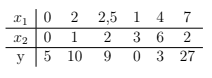

#### utilize a regressão linear múltipla para ajustar os dados. Para isso, obtenha o sistema de equações correspondente e resolva-ló para calcular os coeficientes. Para construir o sistema pode utilizar a abordagem padrão que envolve derivar a equação do quadrado dos resíduos e igualar a zero. Ou pode utilizar a formulação geral de mínimos quadrados, neste caso deve identificar as funções base, construir a matriz Z, calcular a transposta e obter o sistema de equações. Obtida a função de ajuste, avalie a qualidade do ajuste e comente os resultados.

In [49]:
import numpy as np
from numpy.linalg import inv

# Dados fornecidos
x1 = np.array([0, 2, 2.5, 1, 4, 7])
x2 = np.array([0, 1, 2, 3, 6, 2])
y = np.array([5, 10, 9, 0, 3, 27])

# Matriz de design (inclui coluna de 1s para o intercepto)
Z = np.column_stack((np.ones(len(x1)), x1, x2))

# Calculando os coeficientes da regressão linear múltipla
beta = inv(Z.T @ Z) @ Z.T @ y

# Coeficientes
a, b1, b2 = beta

# Valores ajustados
y_fit = Z @ beta

# Coeficiente de determinação R^2
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean) ** 2)
ss_residual = np.sum((y - y_fit) ** 2)
r2 = 1 - (ss_residual / ss_total)

print(f"Coeficientes: a = {a}, b1 = {b1}, b2 = {b2}")
print(f"Coeficiente de Determinação (R^2): {r2}")


Coeficientes: a = 4.999999999999997, b1 = 3.9999999999999996, b2 = -2.9999999999999982
Coeficiente de Determinação (R^2): 1.0


### 3. A regressão linear simples dado um conjunto de n pontos $(x_1, y_1), (x_2, y_2), · · ·, (x_n, y_n)$ é dada pela expressão:

### $\begin{align}y = a_0 + a_1x + e\end{align}$

### os coeficientes de ajuste podem ser calculados usando o sistema de equações

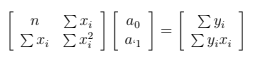

### mostre que esse sistema de equações pode ser obtido a partir da formulação geral de mínimos quadrados. Para isso:

a) Indentique as funções base correspondente à esta fórmula de regressão.

b) Expresse os componentes da formulação geral para este caso $Y, [Z]\ e\ A$.

c) Calcule a matriz do sistema de equações de minimos quadrados como $[Z]^T
[Z]$

d) Calcule o vetor independente do sistema como $[Z]^T Y$.